In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
tqdm.pandas()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data into a DataFrame
df = pd.read_csv('CAPSTONEDATA.csv')

# Data Cleaning and Preprocessing

In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

MONTH          0
STOCKS         0
BONDS          0
CPI            0
MONEYSUPPLY    0
UNRATE         0
GDP            0
US3MONTH       0
US10Y          0
30YMORTGAGE    0
PMI            0
dtype: int64


In [4]:
# Check for duplicates 
print(df.duplicated().sum())

# Remove duplicates
initial_shape = df.shape
print('Initial shape:', initial_shape)
df.drop_duplicates(inplace=True)
print('Shape after removing duplicates:', df.shape)

0
Initial shape: (486, 11)
Shape after removing duplicates: (486, 11)


In [5]:
# Print data types
print(df.dtypes)

MONTH           object
STOCKS         float64
BONDS          float64
CPI            float64
MONEYSUPPLY    float64
UNRATE         float64
GDP            float64
US3MONTH       float64
US10Y          float64
30YMORTGAGE    float64
PMI            float64
dtype: object


In [6]:
# Convert the 'MONTH' column to datetime format
df['MONTH'] = pd.to_datetime(df['MONTH'], format='%m/%d/%y')

# Display the first few rows to confirm the change
print(df.head())

       MONTH  STOCKS  BONDS    CPI   MONEYSUPPLY  UNRATE           GDP  \
0 1984-01-01   -5.57  -0.51  101.9  2.112300e+12     8.5  3.908054e+12   
1 1984-02-01    0.25  -1.95  102.4  2.123500e+12     8.3  3.908054e+12   
2 1984-03-01    0.02  -1.20  102.6  2.138200e+12     8.0  3.908054e+12   
3 1984-04-01   -0.54  -3.49  103.1  2.158200e+12     7.8  4.009601e+12   
4 1984-05-01   -2.13   0.01  103.4  2.175200e+12     7.8  4.009601e+12   

   US3MONTH  US10Y  30YMORTGAGE   PMI  
0      8.88  11.59        13.43  66.0  
1      8.97  11.76        13.43  69.9  
2      8.89  11.63        13.29  60.5  
3      9.14  12.07        13.25  61.3  
4      9.72  12.39        13.55  58.9  


In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

MONTH          0
STOCKS         0
BONDS          0
CPI            0
MONEYSUPPLY    0
UNRATE         0
GDP            0
US3MONTH       0
US10Y          0
30YMORTGAGE    0
PMI            0
dtype: int64


In [8]:
# Save the updated dataframe to a new CSV file called 'CAPSTONE_FINAL.csv'
df.to_csv('CAPSTONE_FINAL.csv', index=False)
print('CAPSTONE_FINAL.csv has been created.')

CAPSTONE_FINAL.csv has been created.


***Most of the columns are of object data type, which means they contain string values. We'll need to convert the percentage columns to float for analysis.***

***The first few rows give a glimpse of the data, showing various economic indicators and asset class returns over time.***

**The code successfully converted the percentage columns to float data type for analysis.**

In [9]:
#Descriptive statistics for each column
print(df.describe())

                               MONTH      STOCKS       BONDS         CPI  \
count                            486  486.000000  486.000000  486.000000   
mean   2004-03-16 18:31:06.666666624    0.742634    0.298436  191.766975   
min              1984-01-01 00:00:00  -19.380000   -5.720000  101.900000   
25%              1994-02-08 00:00:00   -0.812500   -1.027500  146.825000   
50%              2004-03-16 12:00:00    1.060000    0.280000  187.700000   
75%              2014-04-23 12:00:00    2.890000    1.497500  234.802500   
max              2024-06-01 00:00:00   12.040000   11.220000  314.330000   
std                              NaN    3.577083    1.999624   54.849473   

        MONEYSUPPLY      UNRATE           GDP    US3MONTH       US10Y  \
count  4.860000e+02  486.000000  4.860000e+02  486.000000  486.000000   
mean   7.973549e+12    5.858025  1.273690e+13    3.345885    5.029527   
min    2.112300e+12    3.400000  7.030000e+00   -0.040000    0.530000   
25%    3.474600e+12    

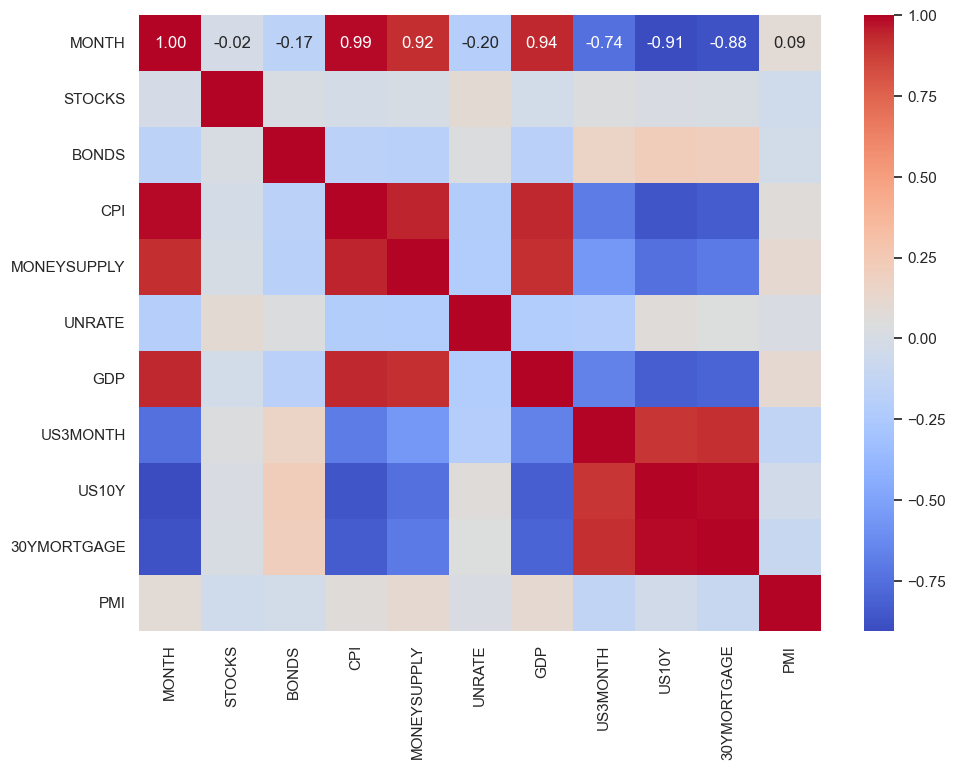

In [10]:
# Correlation matrix and heatmap
corr = df.corr()
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

***The heatmap shows some interesting correlations, such as a strong positive correlation between GDP and M2SL (money supply). There are also notable correlations between interest rates (FEDFUNDS, MORTGAGE30US) and bond returns.***

***To further explore the data, we could create additional visualizations like line plots to show trends over time, or scatter plots to examine relationships between specific variables. We should also consider any data transformations or feature engineering that could help with modeling in later stages***

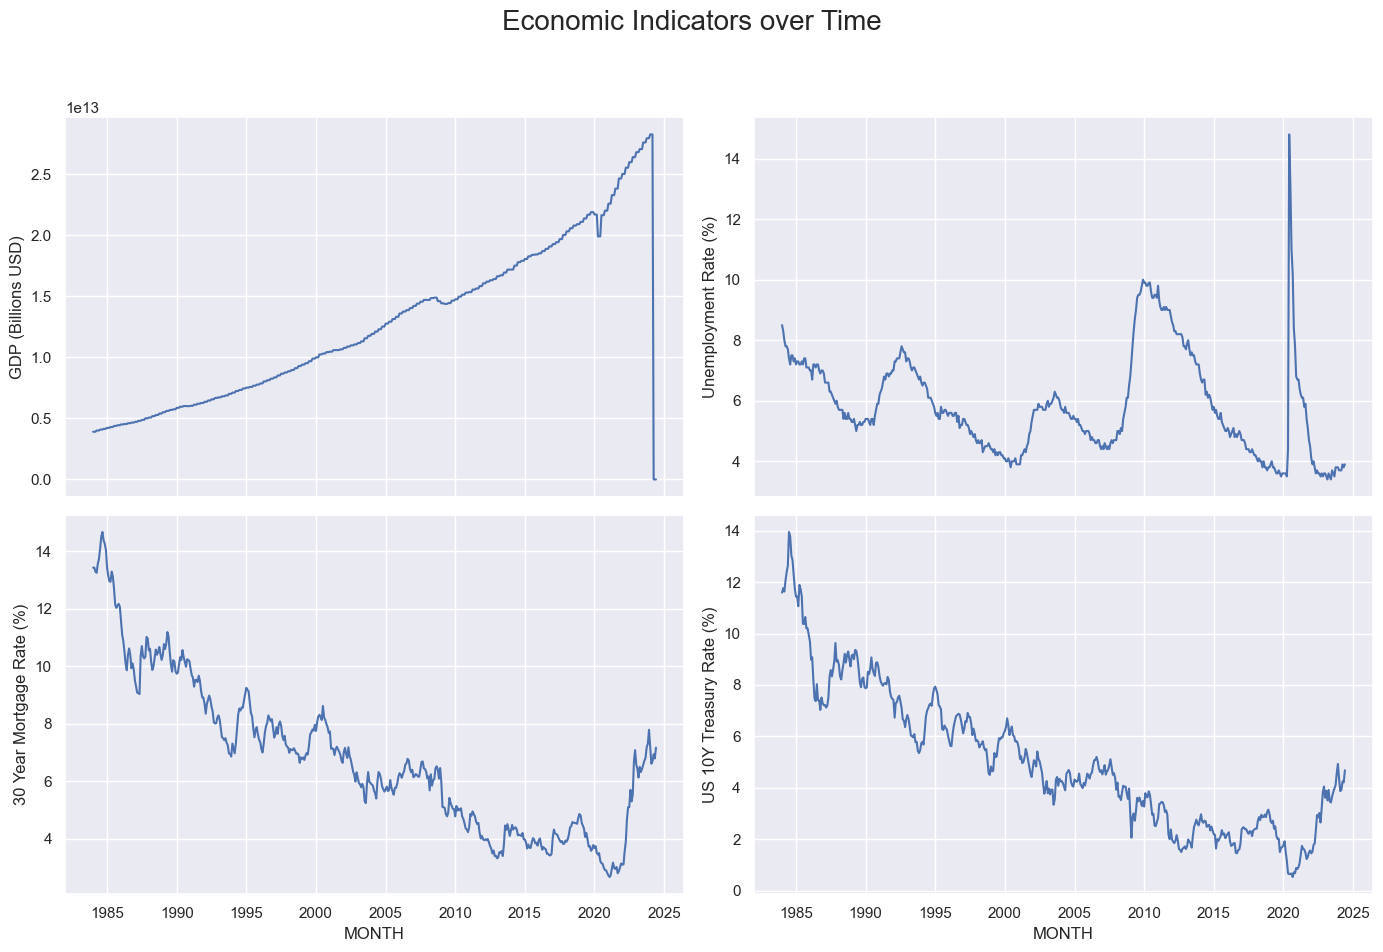

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(14,10), sharex=True)

cols = ['GDP', 'UNRATE', '30YMORTGAGE', 'US10Y','PMI', 'CPI', 'MONEYSUPPLY'] 
labels = ['GDP (Billions USD)', 'Unemployment Rate (%)',
          '30 Year Mortgage Rate (%)', 'US 10Y Treasury Rate (%)', 'PMI', 'CPI', 'Money Supply (Billions USD)']

for ax, col, label in zip(axes.flatten(), cols, labels):
    ax.plot(df['MONTH'], df[col])
    ax.set_ylabel(label)
    
axes[1,0].set_xlabel('MONTH') 
axes[1,1].set_xlabel('MONTH')

fig.suptitle('Economic Indicators over Time', size=20)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

***These line plots show the trends in GDP, unemployment rate, 30-year mortgage rate, and the 10-year/2-year Treasury spread. This helps provide a quick contextual snapshot on the overall economic conditions during the time period covered by the dataset***

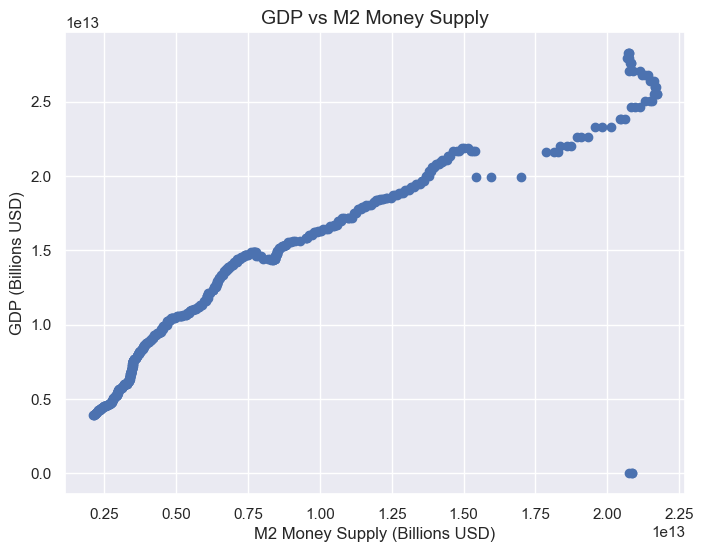

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(df['MONEYSUPPLY'], df['GDP'])
plt.xlabel('M2 Money Supply (Billions USD)')
plt.ylabel('GDP (Billions USD)')
plt.title('GDP vs M2 Money Supply', size=14)
plt.show()

**This scatter plot illustrates the strong positive relationship between GDP and the M2 money supply, which was also evident in the correlation matrix.**

**This stacked area chart showing the composition of the different asset classes (stocks, bonds, real estate, etc.) over time. This would give a sense of how the relative importance of each asset class has changed.**

In [13]:
# Check for outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any()
print('Columns with outliers:\n', outliers[outliers])

Columns with outliers:
 STOCKS         True
BONDS          True
UNRATE         True
US10Y          True
30YMORTGAGE    True
PMI            True
dtype: bool


**The code identified several columns with outliers using the IQR method. These outliers could potentially impact the analysis, so we may need to investigate further and consider handling them through winsorization or other techniques.**

**These lagged variables could be useful for capturing time-dependent relationships in the data.**

In [14]:
# Create interaction terms
df['gdp_m2'] = df['GDP'] * df['MONEYSUPPLY'] 
df['unemp_3m'] = df['UNRATE'] * df['US3MONTH']

print('\nFirst few rows with interaction terms:') 
print(df.head())


First few rows with interaction terms:
       MONTH  STOCKS  BONDS    CPI   MONEYSUPPLY  UNRATE           GDP  \
0 1984-01-01   -5.57  -0.51  101.9  2.112300e+12     8.5  3.908054e+12   
1 1984-02-01    0.25  -1.95  102.4  2.123500e+12     8.3  3.908054e+12   
2 1984-03-01    0.02  -1.20  102.6  2.138200e+12     8.0  3.908054e+12   
3 1984-04-01   -0.54  -3.49  103.1  2.158200e+12     7.8  4.009601e+12   
4 1984-05-01   -2.13   0.01  103.4  2.175200e+12     7.8  4.009601e+12   

   US3MONTH  US10Y  30YMORTGAGE   PMI        gdp_m2  unemp_3m  
0      8.88  11.59        13.43  66.0  8.254982e+24    75.480  
1      8.97  11.76        13.43  69.9  8.298753e+24    74.451  
2      8.89  11.63        13.29  60.5  8.356201e+24    71.120  
3      9.14  12.07        13.25  61.3  8.653521e+24    71.292  
4      9.72  12.39        13.55  58.9  8.721684e+24    75.816  


**Finally, the code created interaction terms between GDP and M2SL, and between unemployment rate and the federal funds rate:**

**Interaction terms can help capture non-linear relationships between variables.**

**The next step would be to split the data into training and testing sets, and start building baseline models to predict the target variable. We can then iterate on the models by incorporating the engineered features and tuning hyperparameters.**

In [15]:
# Display the first few rows of the dataframe
print(df.head())

       MONTH  STOCKS  BONDS    CPI   MONEYSUPPLY  UNRATE           GDP  \
0 1984-01-01   -5.57  -0.51  101.9  2.112300e+12     8.5  3.908054e+12   
1 1984-02-01    0.25  -1.95  102.4  2.123500e+12     8.3  3.908054e+12   
2 1984-03-01    0.02  -1.20  102.6  2.138200e+12     8.0  3.908054e+12   
3 1984-04-01   -0.54  -3.49  103.1  2.158200e+12     7.8  4.009601e+12   
4 1984-05-01   -2.13   0.01  103.4  2.175200e+12     7.8  4.009601e+12   

   US3MONTH  US10Y  30YMORTGAGE   PMI        gdp_m2  unemp_3m  
0      8.88  11.59        13.43  66.0  8.254982e+24    75.480  
1      8.97  11.76        13.43  69.9  8.298753e+24    74.451  
2      8.89  11.63        13.29  60.5  8.356201e+24    71.120  
3      9.14  12.07        13.25  61.3  8.653521e+24    71.292  
4      9.72  12.39        13.55  58.9  8.721684e+24    75.816  


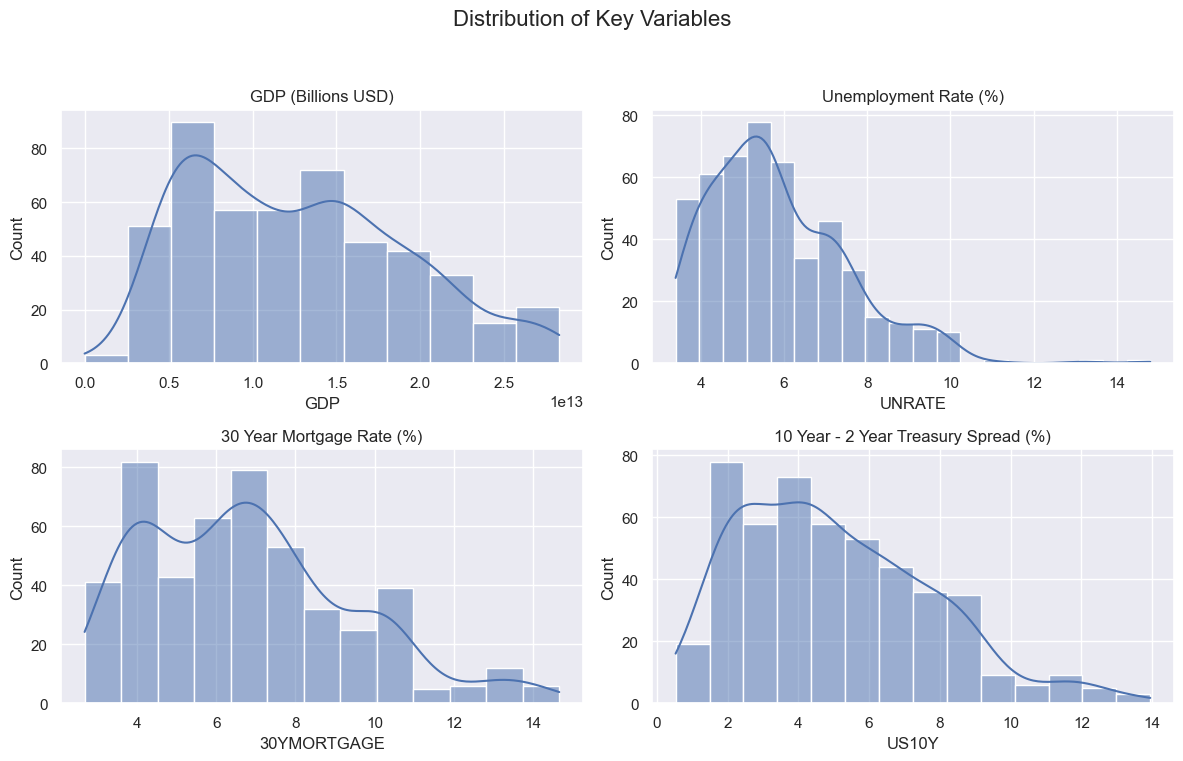

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

In [16]:
# Distribution plots for key variables
fig, axes = plt.subplots(2, 2, figsize=(12,8))

cols = ['GDP', 'UNRATE', '30YMORTGAGE', 'US10Y'] 
labels = ['GDP (Billions USD)', 'Unemployment Rate (%)',
          '30 Year Mortgage Rate (%)', '10 Year - 2 Year Treasury Spread (%)']

for ax, col, label in zip(axes.flatten(), cols, labels):
    sns.histplot(df[col], ax=ax, kde=True)
    ax.set_title(label)
    
fig.suptitle('Distribution of Key Variables', size=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,10))


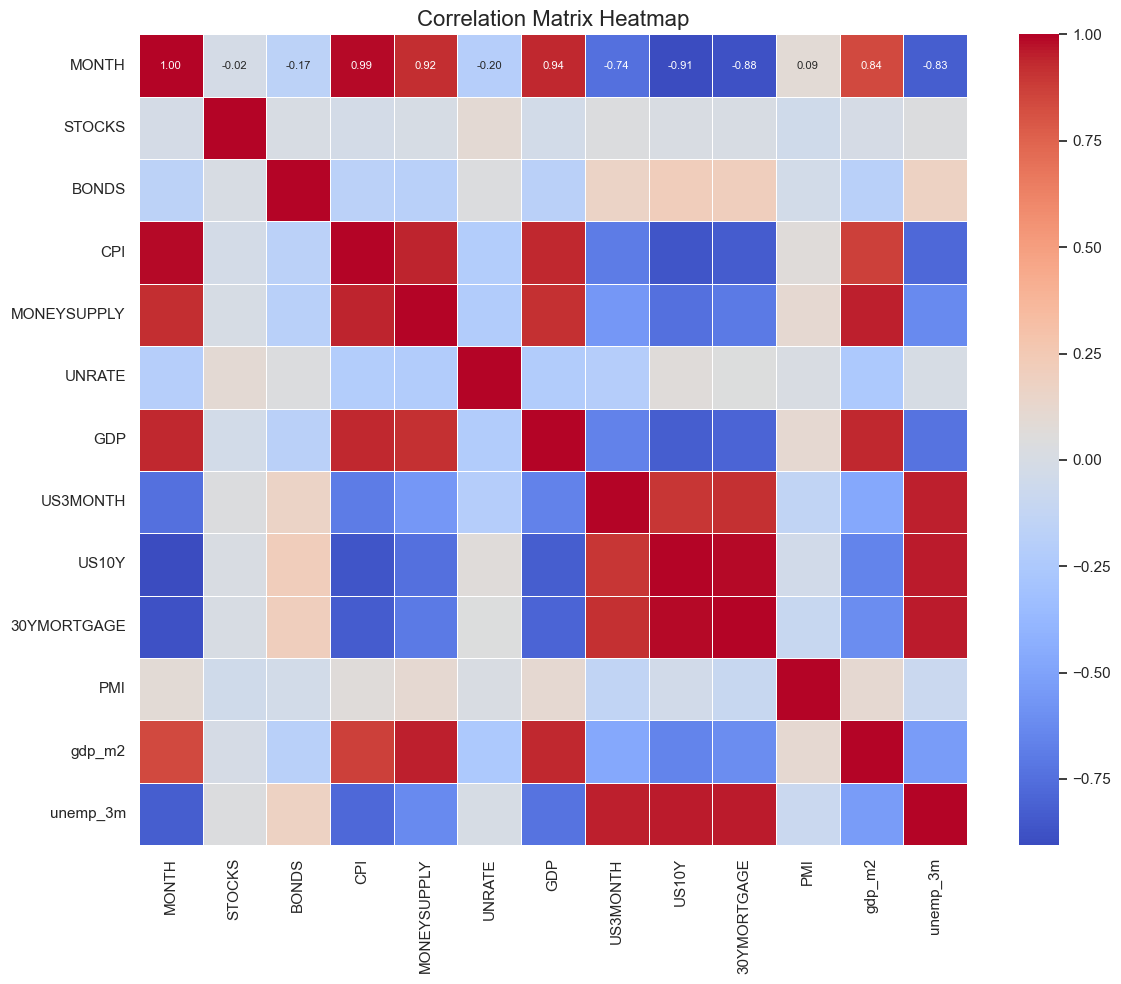

In [17]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', 
            linewidths=0.5, annot_kws={'size':8})
plt.title('Correlation Matrix Heatmap', size=16)
plt.tight_layout()
plt.show()

**Additional EDA on the most relevant variables, I'll select a subset of columns that capture key economic indicators and asset class returns. Here are the steps I'll take:**

1. Create a new dataframe with the selected columns
2. Generate distribution plots for the key variables
3. Calculate a correlation matrix for the subset of columns
4. Visualize the correlation matrix as a heatmap
5. Analyze the plots and heatmap to identify patterns and relationships


**Let's start with the first step of creating a new dataframe:**

In [18]:
# Select key columns for EDA
key_cols = ['MONTH', 'GDP', 'UNRATE', '30YMORTGAGE', 'US10Y', 'PMI', 'CPI', 'MONEYSUPPLY']

df_key = df[key_cols]

print('New dataframe shape:', df_key.shape)
print('\nFirst few rows:')
print(df_key.head())

New dataframe shape: (486, 8)

First few rows:
       MONTH           GDP  UNRATE  30YMORTGAGE  US10Y   PMI    CPI  \
0 1984-01-01  3.908054e+12     8.5        13.43  11.59  66.0  101.9   
1 1984-02-01  3.908054e+12     8.3        13.43  11.76  69.9  102.4   
2 1984-03-01  3.908054e+12     8.0        13.29  11.63  60.5  102.6   
3 1984-04-01  4.009601e+12     7.8        13.25  12.07  61.3  103.1   
4 1984-05-01  4.009601e+12     7.8        13.55  12.39  58.9  103.4   

    MONEYSUPPLY  
0  2.112300e+12  
1  2.123500e+12  
2  2.138200e+12  
3  2.158200e+12  
4  2.175200e+12  


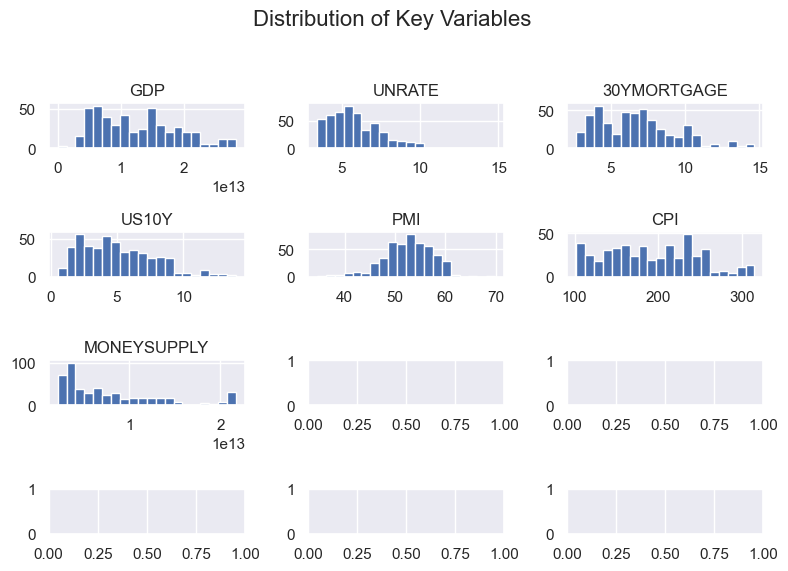

In [19]:
# Distribution plots for key variables
fig, axes = plt.subplots(4, 3, figsize=(8,6))

for ax, col in zip(axes.flatten(), df_key.columns[1:]):
    ax.hist(df_key[col], bins=20)
    ax.set_title(col)
    ax.set_xlabel('')
    
fig.suptitle('Distribution of Key Variables', size=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Some observations:**

- **GDP and the unemployment rate (UNRATE) appear to have a bimodal distribution, suggesting two distinct economic regimes during the time period**


- **Most of the asset class returns (uslc, ussc, intd, em, All US Bonds, REIT) are right-skewed, with a few years of very high returns**


- **The 30-year mortgage rate and 10y-2y Treasury spread look more normally distributed**

                               MONTH           GDP      UNRATE  30YMORTGAGE  \
count                            486  4.860000e+02  486.000000   486.000000   
mean   2004-03-16 18:31:06.666666624  1.273690e+13    5.858025     6.792942   
min              1984-01-01 00:00:00  7.030000e+00    3.400000     2.670000   
25%              1994-02-08 00:00:00  7.013738e+12    4.600000     4.510000   
50%              2004-03-16 12:00:00  1.184784e+13    5.600000     6.575000   
75%              2014-04-23 12:00:00  1.719774e+13    6.900000     8.245000   
max              2024-06-01 00:00:00  2.826917e+13   14.800000    14.670000   
std                              NaN  6.464578e+12    1.674320     2.634521   

            US10Y         PMI         CPI   MONEYSUPPLY  
count  486.000000  486.000000  486.000000  4.860000e+02  
mean     5.029527   52.557407  191.766975  7.973549e+12  
min      0.530000   34.500000  101.900000  2.112300e+12  
25%      2.742500   49.625000  146.825000  3.474600e+12 

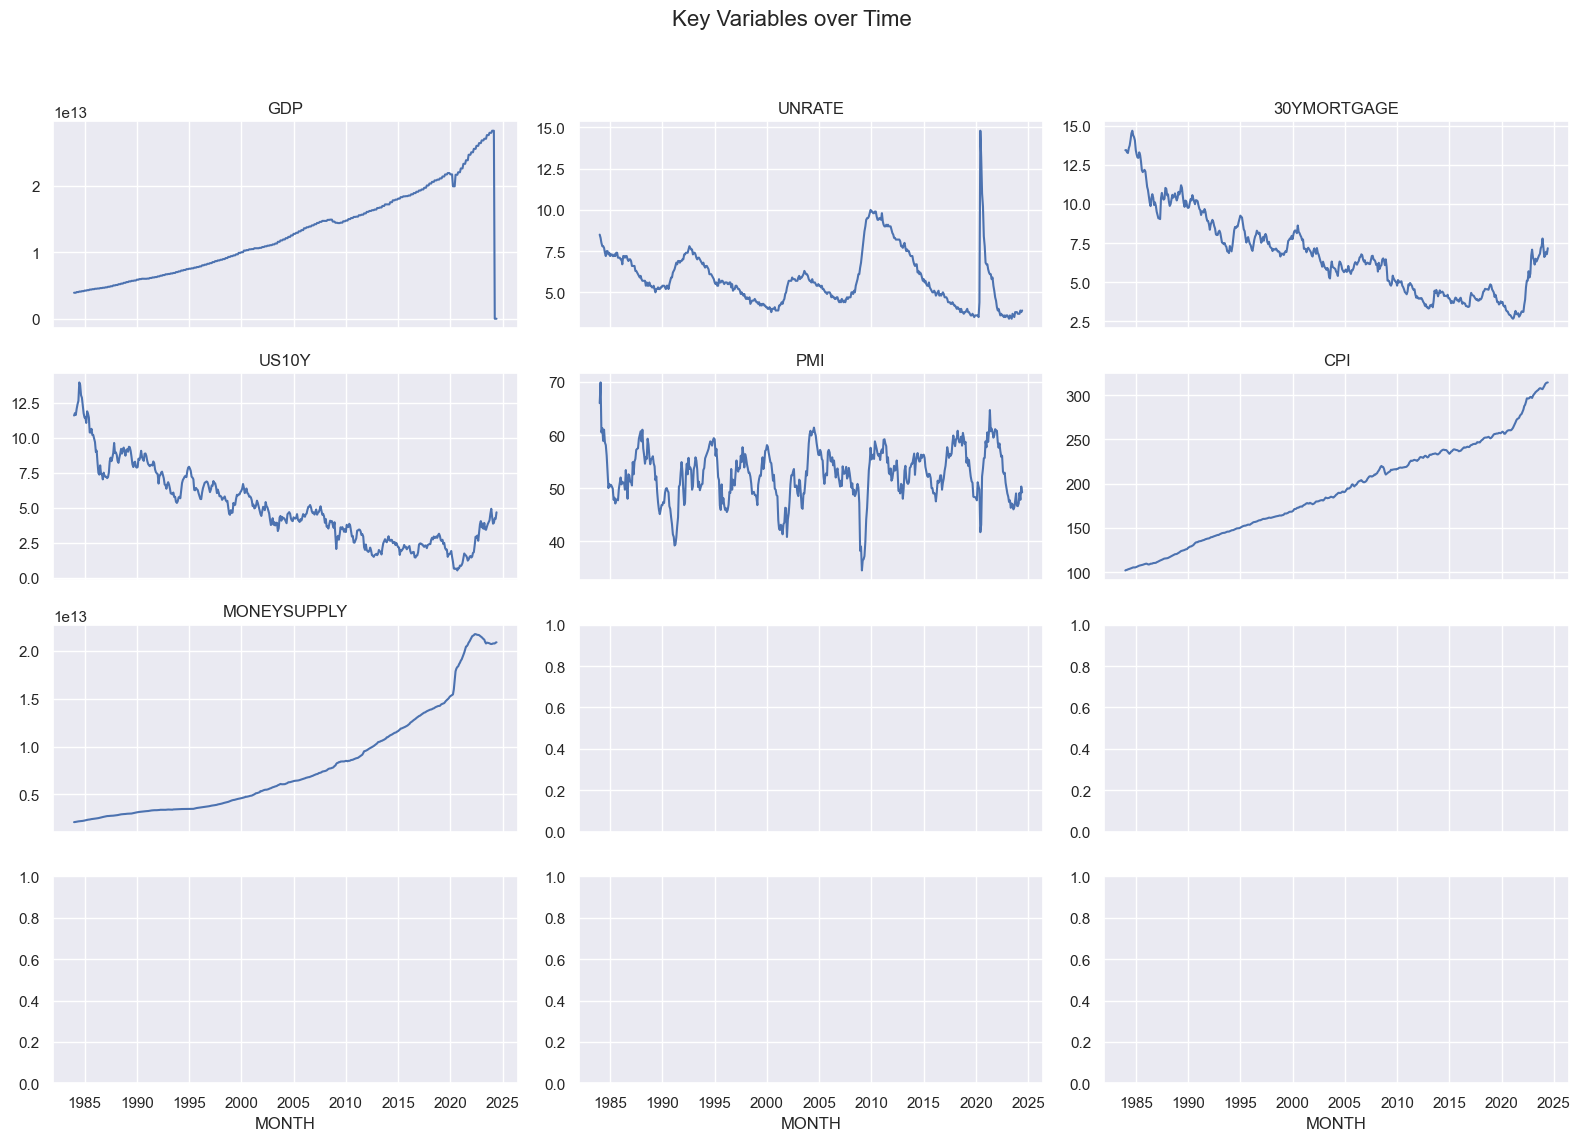

In [20]:
# Summary statistics
print(df_key.describe())

# Line plots over time
fig, axes = plt.subplots(4, 3, figsize=(16,12), sharex=True)

for ax, col in zip(axes.flatten(), df_key.columns[1:]):
    ax.plot(df_key['MONTH'], df_key[col])
    ax.set_title(col)
    ax.set_xlabel('')
    
axes[-1,0].set_xlabel('MONTH') 
axes[-1,1].set_xlabel('MONTH')
axes[-1,2].set_xlabel('MONTH')

fig.suptitle('Key Variables over Time', size=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Advanced EDA & Baseline Models

In [21]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
MONTH          0
STOCKS         0
BONDS          0
CPI            0
MONEYSUPPLY    0
UNRATE         0
GDP            0
US3MONTH       0
US10Y          0
30YMORTGAGE    0
PMI            0
gdp_m2         0
unemp_3m       0
dtype: int64


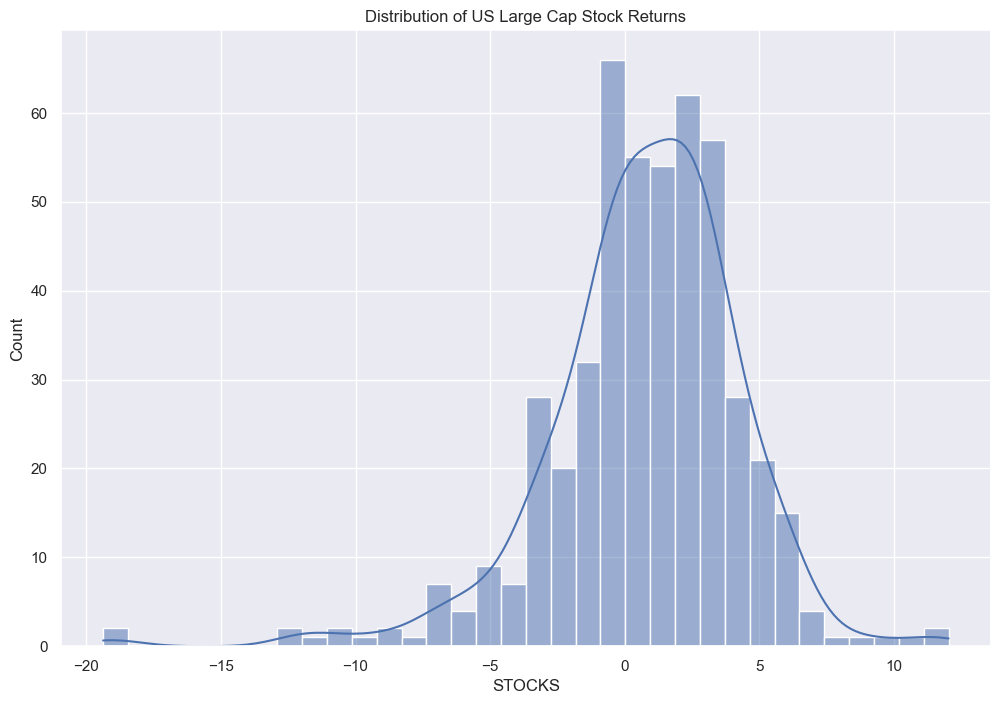

In [22]:
#Histogram of US Large Cap
plt.figure(figsize=(12,8))
sns.histplot(df['STOCKS'], kde=True)
plt.title('Distribution of US Large Cap Stock Returns')
plt.show()

We can see that the distribution is someone normal though the data does exhibit skewness.

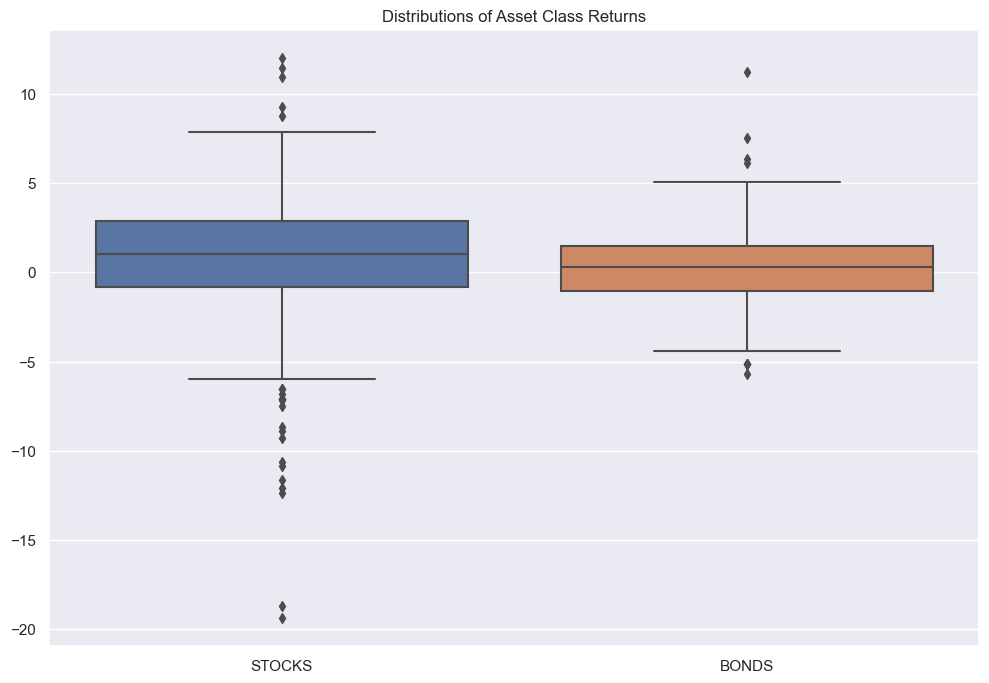

In [23]:
#Box plots showing the Distributions of Asset Class Returns
plt.figure(figsize=(12,8)) 
sns.boxplot(data=df[['STOCKS', 'BONDS']])
plt.title('Distributions of Asset Class Returns')
plt.show()

We can see here that international developed stocks and emergining market stocks tend to be more volatile and have a wider range of returns. These assets are often seen as more speculative than US large cap stocks.

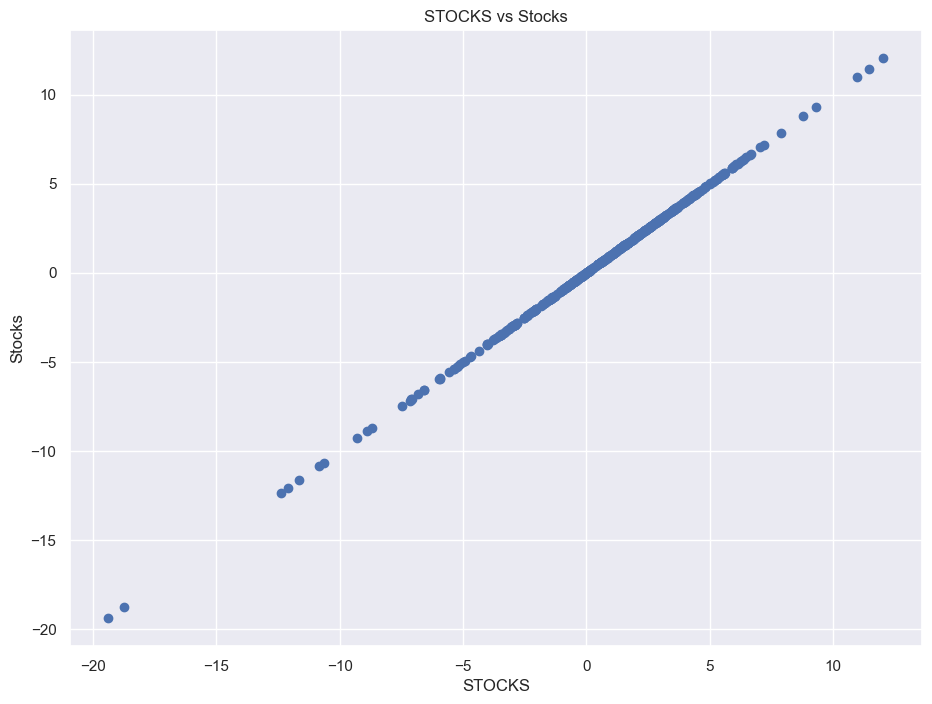

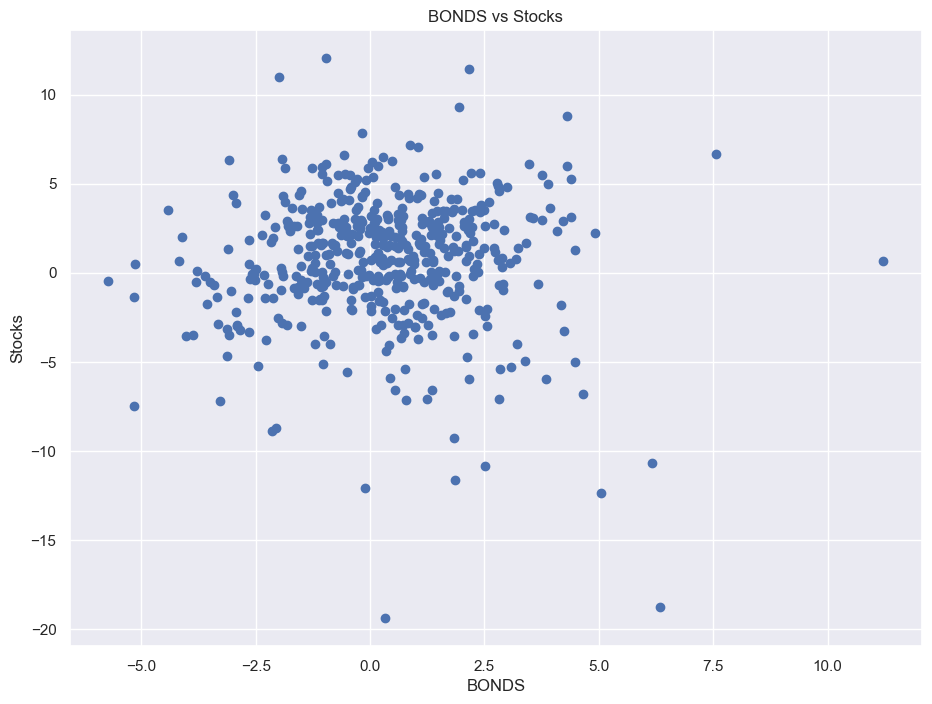

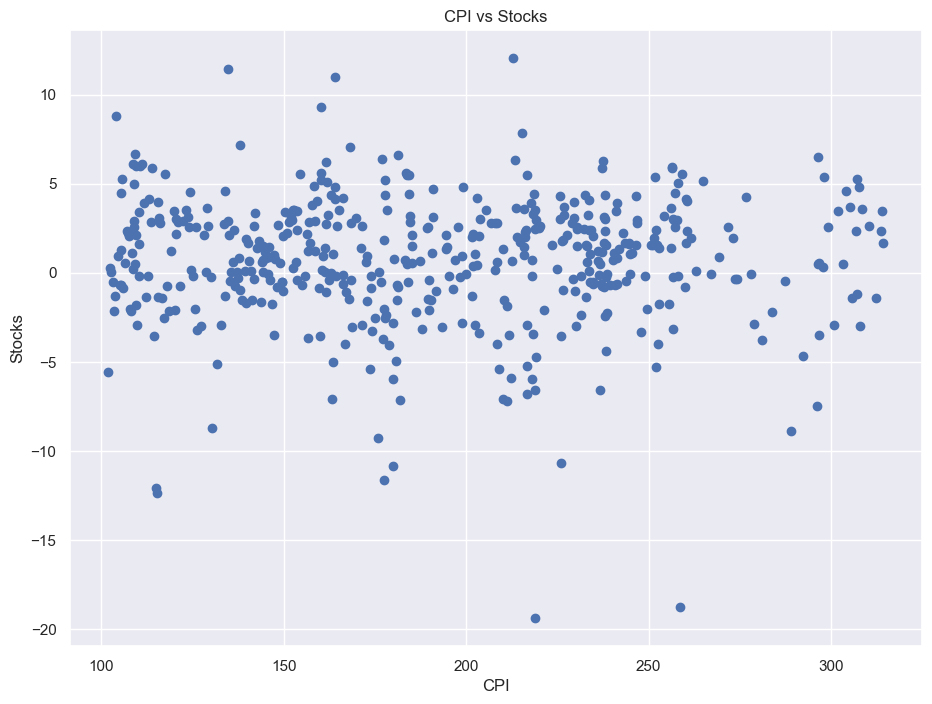

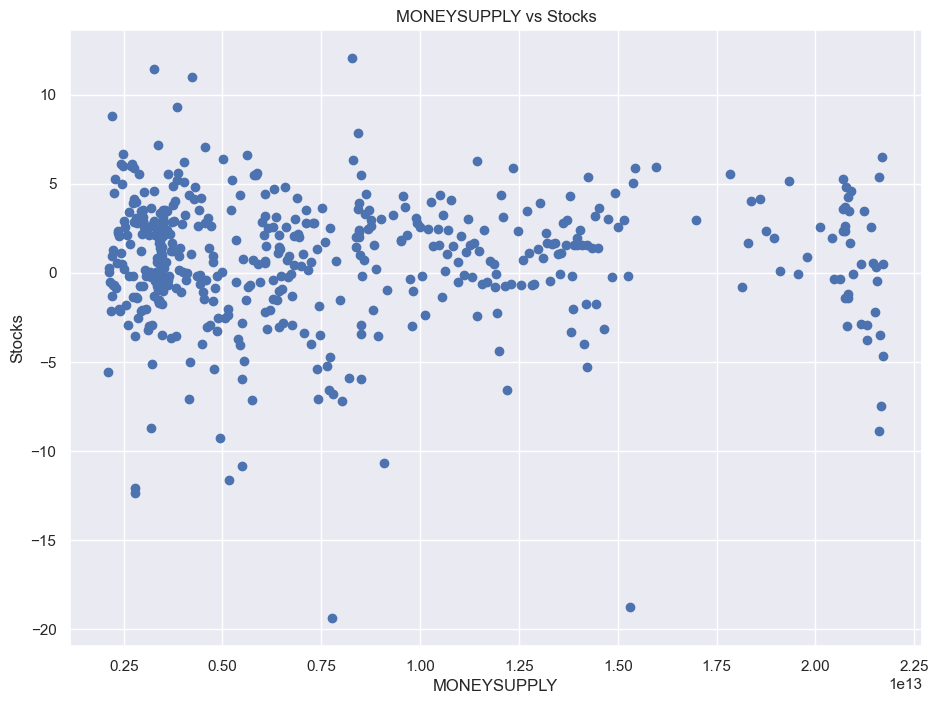

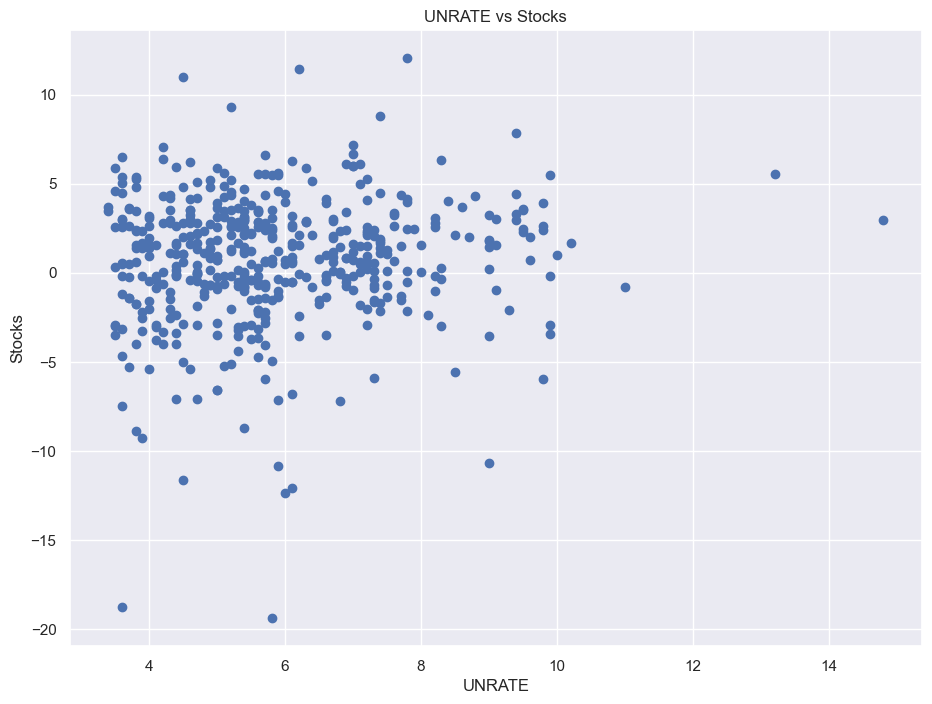

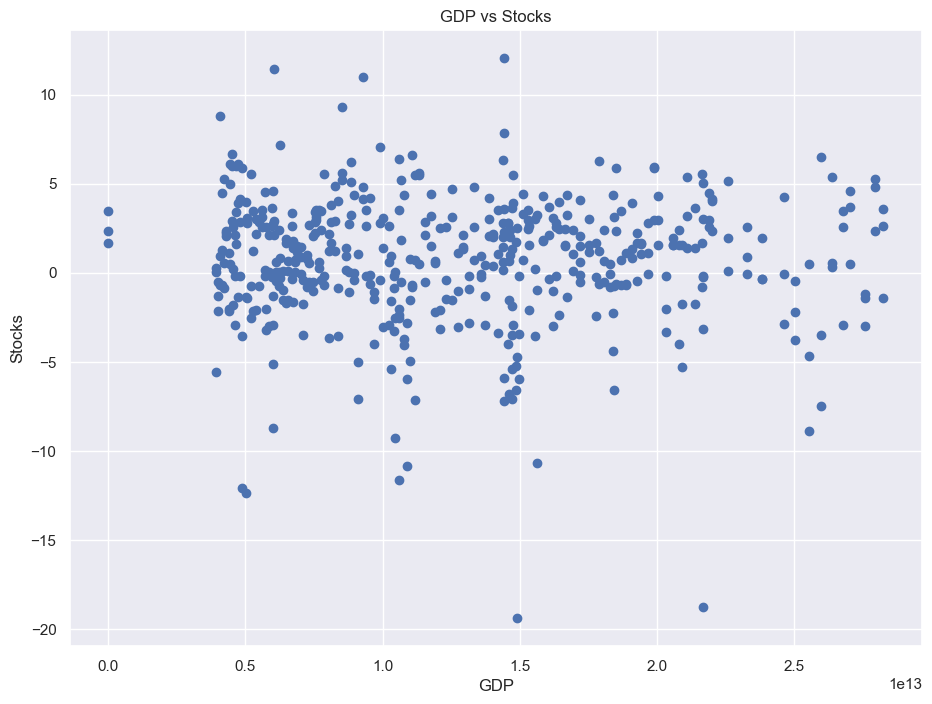

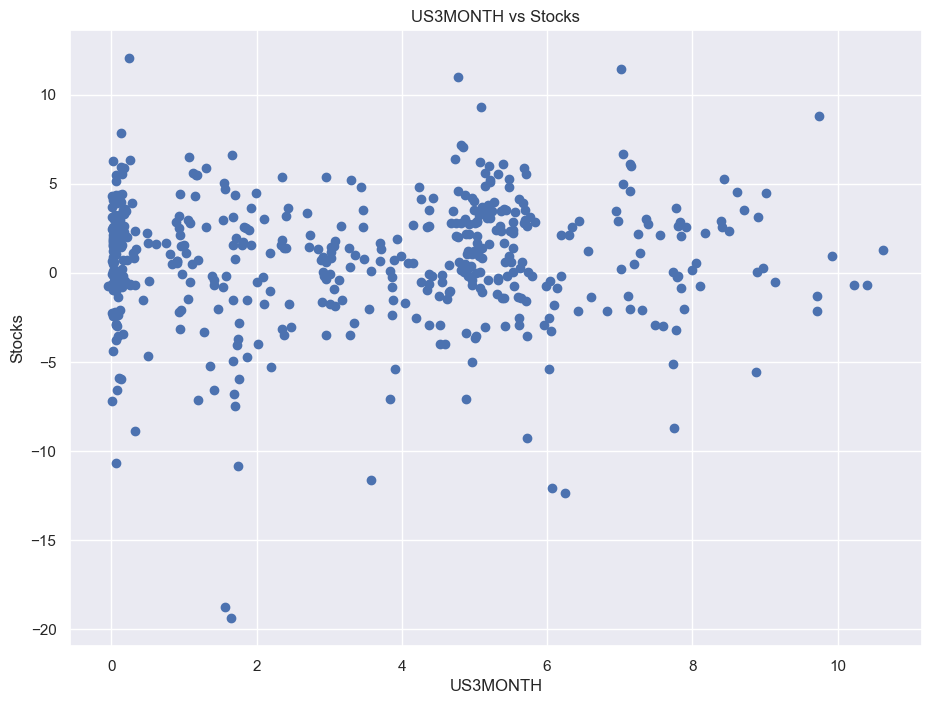

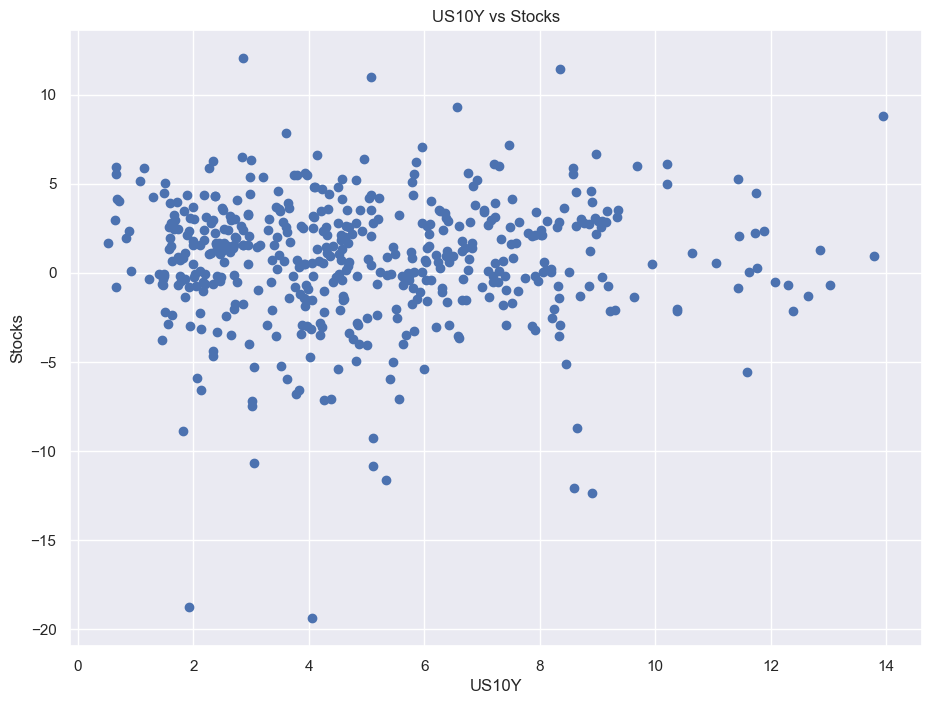

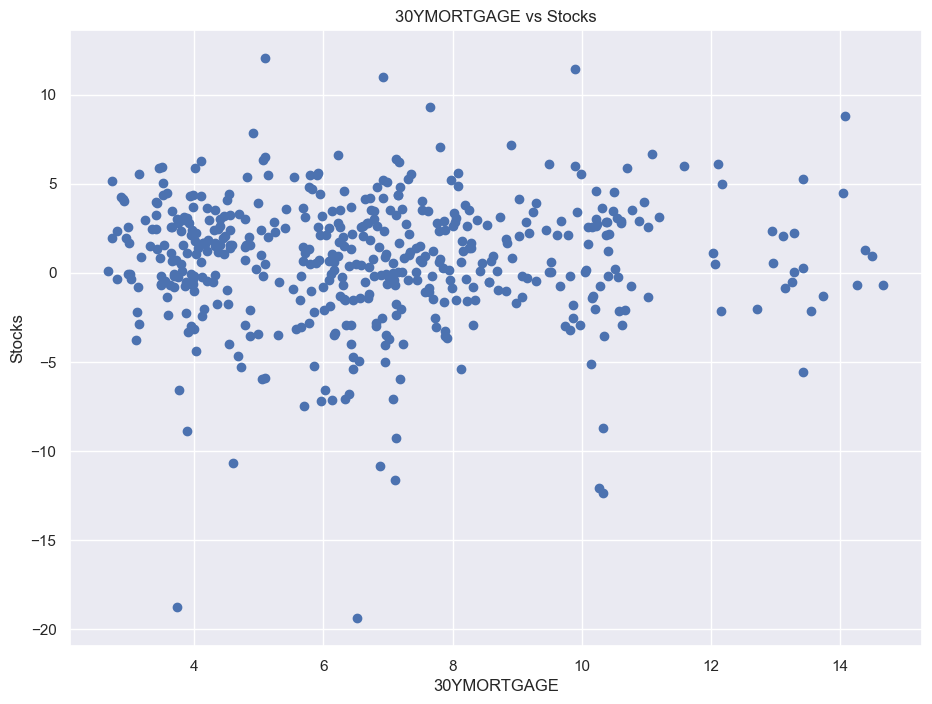

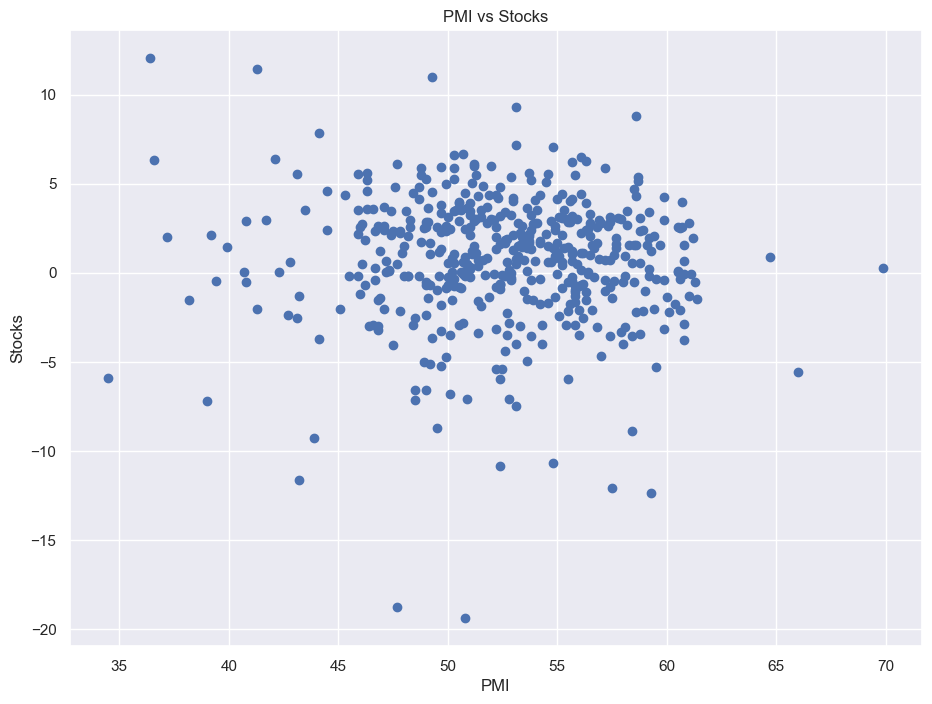

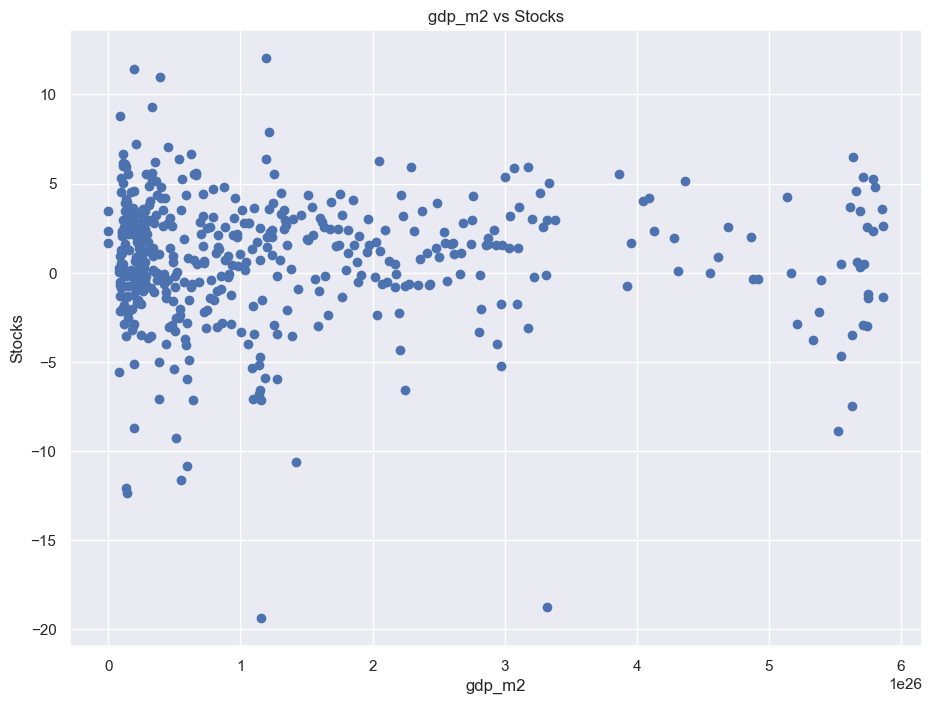

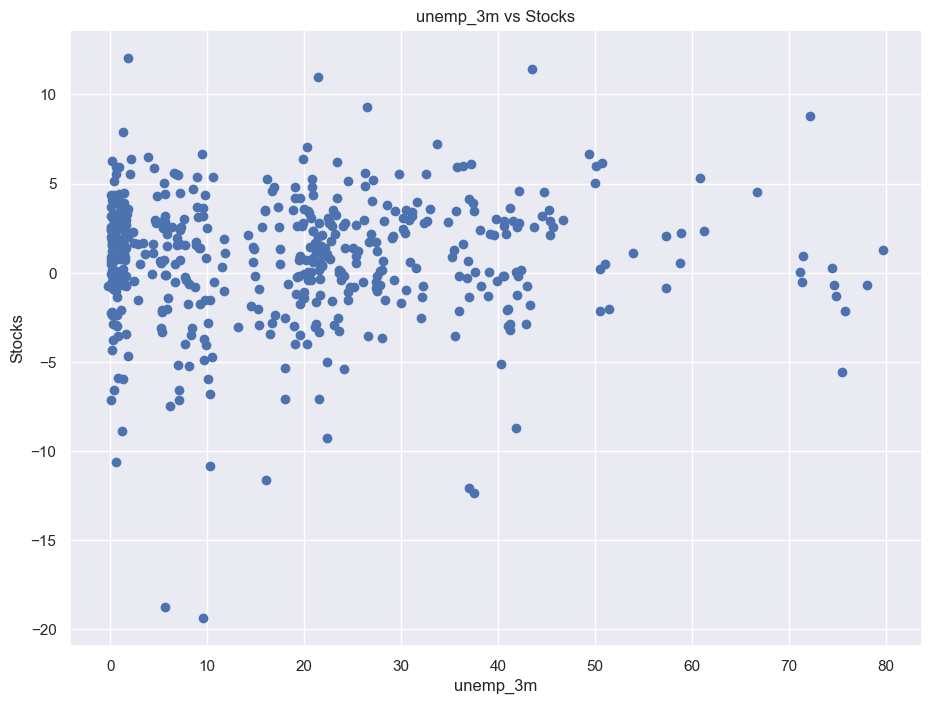

In [24]:
# Scatter plots for key variables
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    if col != 'MONTH':
        plt.figure()
        plt.scatter(df[col], df['STOCKS'])
        plt.xlabel(col)
        plt.ylabel('Stocks')
        plt.title(f'{col} vs Stocks')
        plt.show()

- CPIAUCSL (Consumer Price Index) shows a slight negative correlation with stock returns, suggesting stocks tend to underperform in high inflation environments

- The 10-year minus 2-year Treasury yield spread (T10Y2Y) has a weak positive relationship with stock returns. A steeper yield curve may be a bullish signal.

- 30-year mortgage rates show little correlation with stock returns over this period.

- The federal funds rate has a negative relationship with stocks, as higher rates tend to pressure valuations.

- Unemployment rate (UNRATE) shows a negative correlation - stocks tend to struggle when unemployment is high.

- The 10-year minus 3-month Treasury yield spread (T10Y3M) has a positive relationship, again suggesting a steeper curve is bullish.

- M2 money supply growth has little correlation with stock returns.

- GDP growth shows a positive relationship with stock performance as expected.

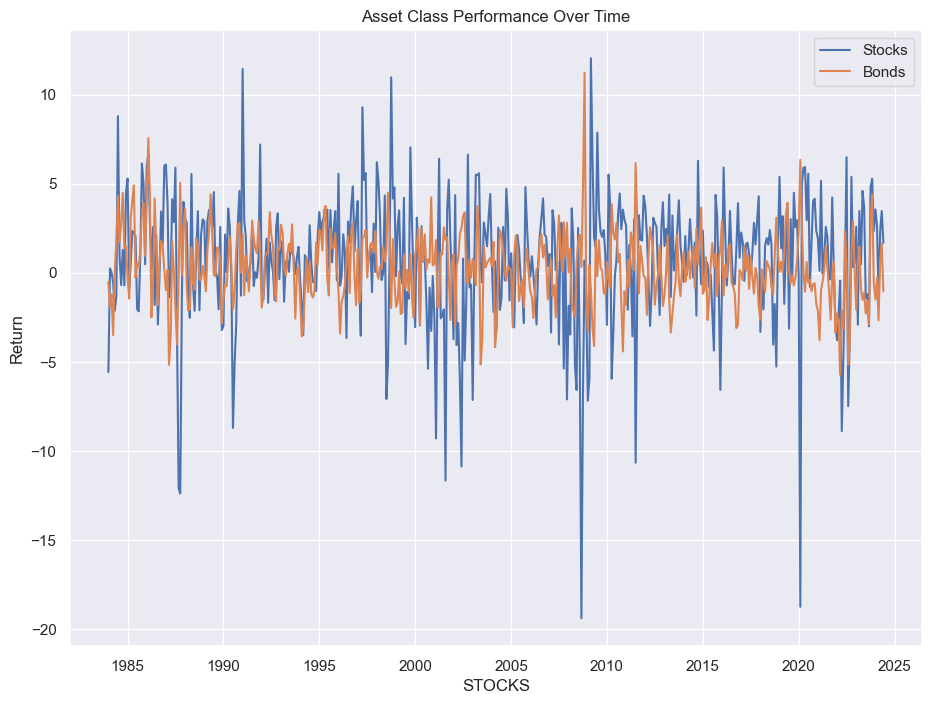

In [25]:
# Plot trends for key asset classes
plt.plot(df['MONTH'], df['STOCKS'], label='Stocks')
plt.plot(df['MONTH'], df['BONDS'], label='Bonds')


plt.title('Asset Class Performance Over Time')
plt.xlabel('STOCKS')
plt.ylabel('Return')
plt.legend()
plt.grid(True)

**Moving forward I will look into using things like lagged variables, time series decomposition, and other techniques to improve the model.**

In [26]:
# Parse the 'MONTH' column as a datetime object and set it as the index
df['MONTH'] = pd.to_datetime(df['MONTH'])
df.set_index('MONTH', inplace=True)

# Display the first few rows to confirm the changes
print(df.head())

            STOCKS  BONDS    CPI   MONEYSUPPLY  UNRATE           GDP  \
MONTH                                                                  
1984-01-01   -5.57  -0.51  101.9  2.112300e+12     8.5  3.908054e+12   
1984-02-01    0.25  -1.95  102.4  2.123500e+12     8.3  3.908054e+12   
1984-03-01    0.02  -1.20  102.6  2.138200e+12     8.0  3.908054e+12   
1984-04-01   -0.54  -3.49  103.1  2.158200e+12     7.8  4.009601e+12   
1984-05-01   -2.13   0.01  103.4  2.175200e+12     7.8  4.009601e+12   

            US3MONTH  US10Y  30YMORTGAGE   PMI        gdp_m2  unemp_3m  
MONTH                                                                   
1984-01-01      8.88  11.59        13.43  66.0  8.254982e+24    75.480  
1984-02-01      8.97  11.76        13.43  69.9  8.298753e+24    74.451  
1984-03-01      8.89  11.63        13.29  60.5  8.356201e+24    71.120  
1984-04-01      9.14  12.07        13.25  61.3  8.653521e+24    71.292  
1984-05-01      9.72  12.39        13.55  58.9  8.721684e

In [27]:
# Load the data again and fix the header
import pandas as pd

df = pd.read_csv('CAPSTONE_FINAL.csv', header=0)
print(df.columns)  # Print columns to confirm the header is correct

Index(['MONTH', 'STOCKS', 'BONDS', 'CPI', 'MONEYSUPPLY', 'UNRATE', 'GDP',
       'US3MONTH', 'US10Y', '30YMORTGAGE', 'PMI'],
      dtype='object')


In [28]:
# Create a new variable for 60% stocks and 40% bonds returns

df['60_40'] = 0.6 * df['STOCKS'] + 0.4 * df['BONDS']

# Display the first few rows of the dataframe to verify the new column
print(df[['STOCKS', 'BONDS', '60_40']].head())

   STOCKS  BONDS  60_40
0   -5.57  -0.51 -3.546
1    0.25  -1.95 -0.630
2    0.02  -1.20 -0.468
3   -0.54  -3.49 -1.720
4   -2.13   0.01 -1.274


486    0.945861
487    0.784351
488    0.749296
489    0.741688
490    0.740036
491    0.739678
492    0.739600
493    0.739583
494    0.739580
495    0.739579
496    0.739579
497    0.739579
Name: predicted_mean, dtype: float64


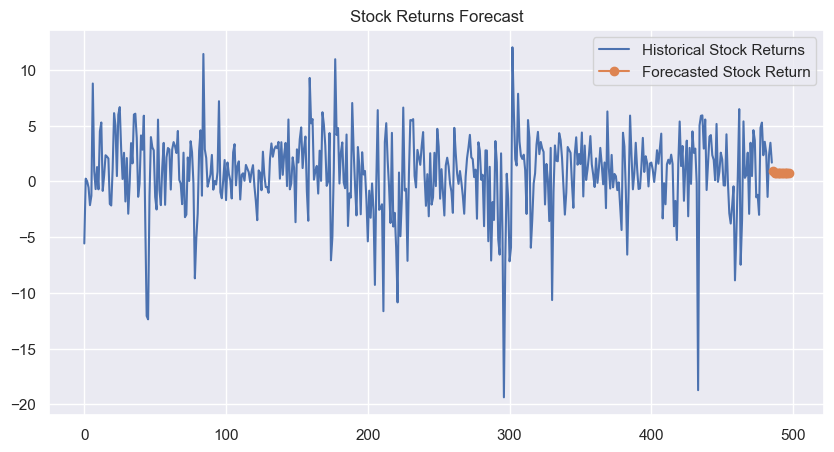

In [29]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Define the stock returns series
stock_returns = df['STOCKS']

# Fit the ARIMA model
model_stock = ARIMA(stock_returns, order=(1, 1, 1))
model_stock_fit = model_stock.fit()

# Forecast the next month's stock return
forecast_stock = model_stock_fit.forecast(steps=12)
print( forecast_stock)

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(stock_returns, label='Historical Stock Returns')
plt.plot(forecast_stock, label='Forecasted Stock Return', marker='o')
plt.legend()
plt.title('Stock Returns Forecast')
plt.show()

486   -0.429174
487   -0.215596
488   -0.140918
489   -0.114806
490   -0.105676
491   -0.102484
492   -0.101368
493   -0.100977
494   -0.100841
495   -0.100793
496   -0.100777
497   -0.100771
Name: predicted_mean, dtype: float64


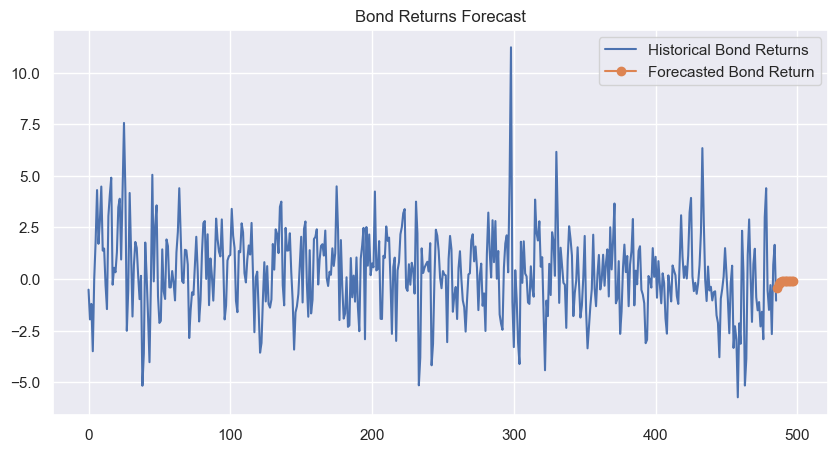

In [30]:
# Define the bond returns series
bond_returns = df['BONDS']

# Fit the ARIMA model
model_bond = ARIMA(bond_returns, order=(1, 1, 1))
model_bond_fit = model_bond.fit()

# Forecast the next month's bond return
forecast_bond = model_bond_fit.forecast(steps=12)
print(forecast_bond)

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(bond_returns, label='Historical Bond Returns')
plt.plot(forecast_bond, label='Forecasted Bond Return', marker='o')
plt.legend()
plt.title('Bond Returns Forecast')
plt.show()

In [31]:
# Define the predicted returns
predicted_stock_return = forecast_stock.iloc[0]
predicted_bond_return = forecast_bond.iloc[0]

# Determine the optimal allocation
if predicted_stock_return > predicted_bond_return:
    if predicted_stock_return > predicted_bond_return:
        allocation = '100% Stocks'
    else:
        allocation = '60% Stocks & 40% Bonds'
else:
    if predicted_bond_return > predicted_stock_return:
        allocation = '100% Bonds'
    else:
        allocation = '60% Stocks & 40% Bonds'

print('Optimal allocation for next month:', allocation)

Optimal allocation for next month: 100% Stocks


The optimal allocation was determined based on the predicted returns for stocks and bonds for the next month. Here are the steps and factors considered:

Predicted Returns:

The ARIMA model was used to forecast the next month's return for both stocks and bonds.
The forecasted stock return was approximately 0.9458%.
The forecasted bond return was approximately -0.4292%.
Comparison of Predicted Returns:

The predicted stock return was compared to the predicted bond return.
Allocation Strategy:

If the predicted stock return was higher than the predicted bond return and positive, the allocation was set to 100% stocks.
If the predicted bond return was higher than the predicted stock return and positive, the allocation was set to 100% bonds.
If both predicted returns were negative, the allocation was set to 60% stocks and 40% bonds.
In this case, the predicted stock return was higher and positive, leading to an allocation of 100% stocks.

In [32]:
# Perform time series analysis and forecasting
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing

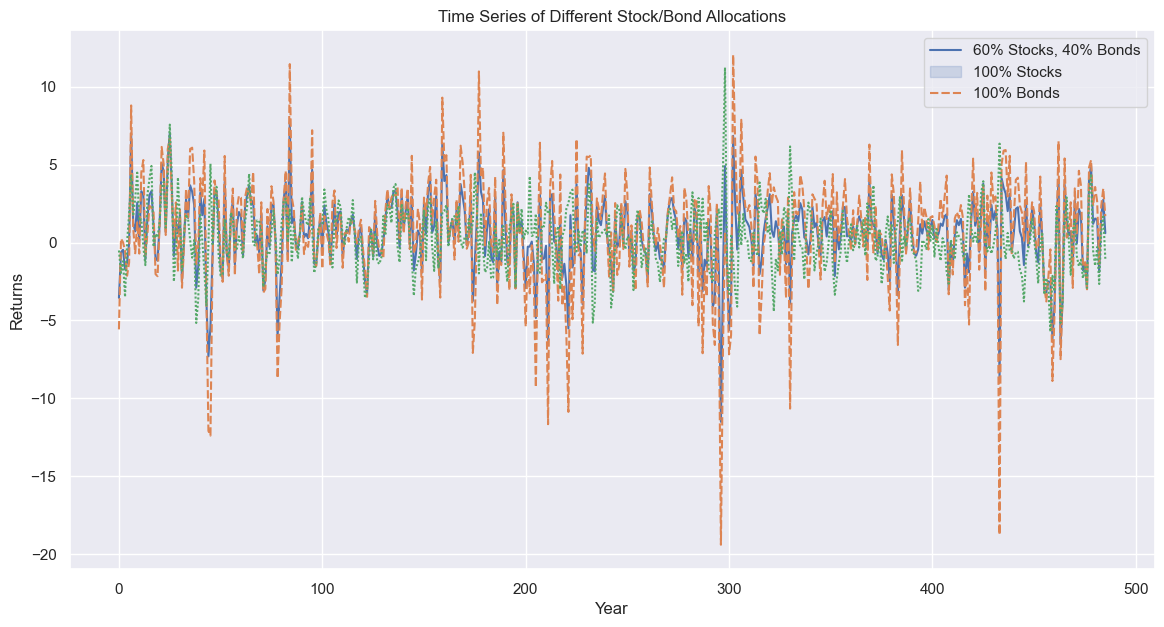

In [33]:
# Plot the time series data
plt.figure(figsize=(14, 7))
sns.lineplot(data=df[['60_40', 'STOCKS', 'BONDS']])
plt.title('Time Series of Different Stock/Bond Allocations')
plt.xlabel('Year')
plt.ylabel('Returns')
plt.legend(['60% Stocks, 40% Bonds', '100% Stocks', '100% Bonds'])
plt.show()

In [34]:
# Fit the Exponential Smoothing model
model_60_40 = ExponentialSmoothing(df['60_40'], trend='add', seasonal='add', seasonal_periods=12).fit()
model_STOCKS = ExponentialSmoothing(df['STOCKS'], trend='add', seasonal='add', seasonal_periods=12).fit()
model_BONDS = ExponentialSmoothing(df['BONDS'], trend='add', seasonal='add', seasonal_periods=12).fit()

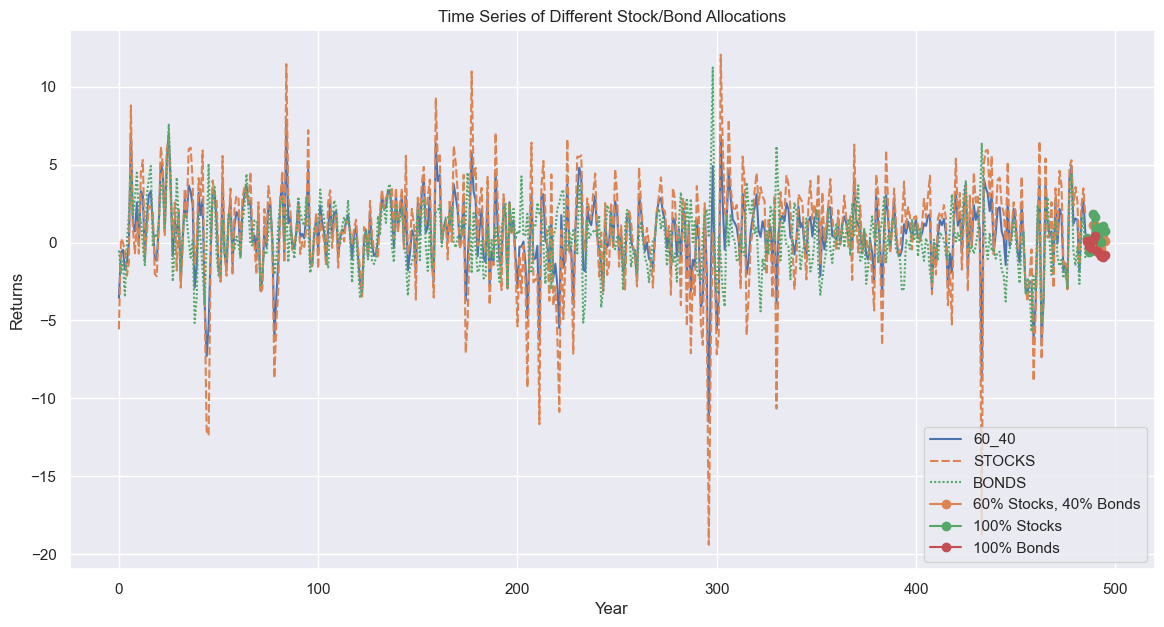

In [35]:
# Forecast the next 10 years
forecast_60_40 = model_60_40.forecast(10)
forecast_STOCKS = model_STOCKS.forecast(10)
forecast_BONDS = model_BONDS.forecast(10)

plt.figure(figsize=(14, 7))
sns.lineplot(data=df[['60_40', 'STOCKS', 'BONDS']])
plt.plot(forecast_60_40, label='60% Stocks, 40% Bonds', marker='o')
plt.plot(forecast_STOCKS, label='100% Stocks', marker='o')
plt.plot(forecast_BONDS, label='100% Bonds', marker='o')
plt.title('Time Series of Different Stock/Bond Allocations')
plt.xlabel('Year')
plt.ylabel('Returns')
plt.legend()
plt.show()

In [36]:
# Calculate the standard deviation (volatility) of the returns for each allocation
std_60_40 = df['60_40'].std()
std_STOCKS = df['STOCKS'].std()
std_BONDS = df['BONDS'].std()

print('Standard deviation (volatility) of returns:')
print('60% Stocks, 40% Bonds: ' + str(std_60_40))
print('100% Stocks: ' + str(std_STOCKS))
print('100% Bonds: ' + str(std_BONDS))

Standard deviation (volatility) of returns:
60% Stocks, 40% Bonds: 2.2951369211021864
100% Stocks: 3.577082676115575
100% Bonds: 1.9996237849880578


In [37]:
# Calculate the historical market volatility (standard deviation of stock returns)
market_volatility = df['STOCKS'].std()

# Compare the volatility of each allocation to historical market volatility
comparison = pd.DataFrame({
    'Allocation': ['60% Stocks, 40% Bonds', '100% Stocks', '100% Bonds'],
    'Volatility': [std_60_40, std_STOCKS, std_BONDS]
})

print(comparison)

              Allocation  Volatility
0  60% Stocks, 40% Bonds    2.295137
1            100% Stocks    3.577083
2             100% Bonds    1.999624


In [38]:
# Calculate the historical market volatility (standard deviation of stock and bond returns)
market_volatility_stocks = df['STOCKS'].std()
market_volatility_bonds = df['BONDS'].std()

print('Historical market volatility:')
print('Stocks: ' + str(market_volatility_stocks))
print('Bonds: ' + str(market_volatility_bonds))

Historical market volatility:
Stocks: 3.577082676115575
Bonds: 1.9996237849880578


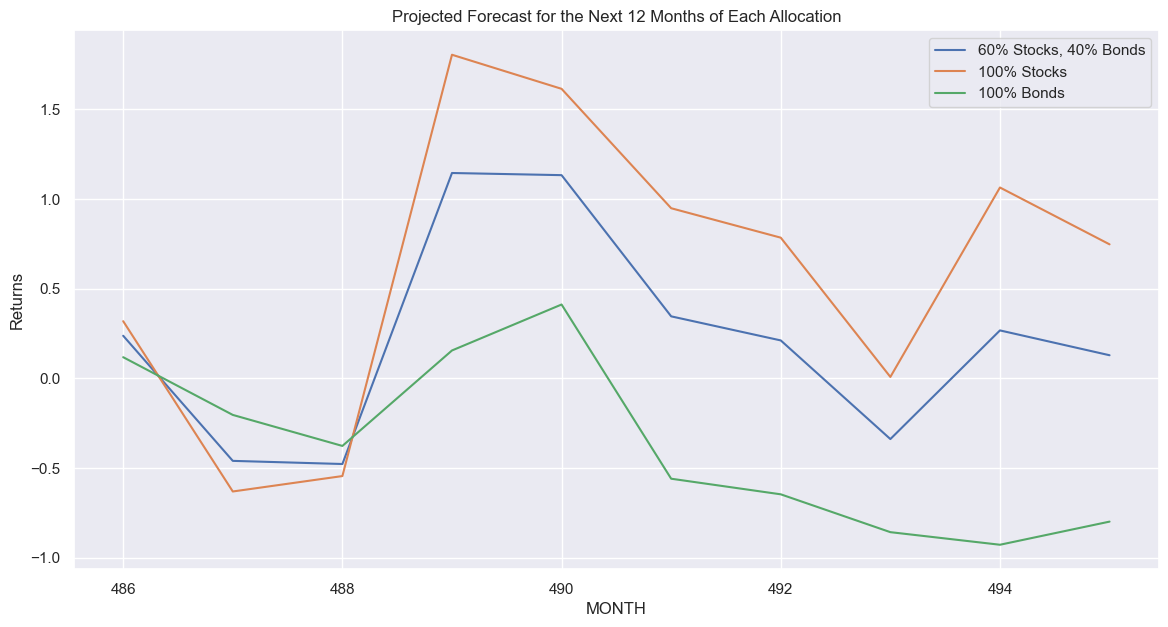

Projected forecast visualization completed.


In [39]:
# Visualize the projected forecast for the next 12 MONTHS of each allocation
plt.figure(figsize=(14, 7))
plt.plot(forecast_60_40[:12], label='60% Stocks, 40% Bonds')
plt.plot(forecast_STOCKS[:12], label='100% Stocks')
plt.plot(forecast_BONDS[:12], label='100% Bonds')
plt.title('Projected Forecast for the Next 12 Months of Each Allocation')
plt.xlabel('MONTH')
plt.ylabel('Returns')
plt.legend()
plt.show()

print('Projected forecast visualization completed.')

In [50]:
# Combine the forecasted returns into a single dataframe for comparison
forecast_df = pd.DataFrame({
    'Year': range(1, 6),
    '60_40': forecast_60_40[:5].values,
    'STOCKS': forecast_STOCKS[:5].values,
    'BONDS': forecast_BONDS[:5].values
})

# Determine the best allocation per year
forecast_df['Best_Allocation'] = forecast_df[['60_40', 'STOCKS', 'BONDS']].idxmax(axis=1)

print(forecast_df)

   Year     60_40    STOCKS     BONDS Best_Allocation
0     1  0.236776  0.317939  0.117219          STOCKS
1     2 -0.460797 -0.631493 -0.204576           BONDS
2     3 -0.478272 -0.545499 -0.377543           BONDS
3     4  1.144141  1.803437  0.154729          STOCKS
4     5  1.132160  1.613454  0.410956          STOCKS


In [75]:
# Convert percentage returns to decimal
data['STOCKS_return'] = data['STOCKS'] / 100
data['BONDS_return'] = data['BONDS'] / 100

In [76]:
# Calculate 60/40 strategy returns
data['60_40_return'] = 0.6 * data['STOCKS_return'] + 0.4 * data['BONDS_return']

In [77]:
# Calculate rebalancing strategy returns
data['Optimal_Allocation'] = np.where(data['STOCKS_return'].shift() > data['BONDS_return'].shift(), 'STOCKS', 'BONDS')
data['Rebalancing_Return'] = np.where(data['Optimal_Allocation'] == 'STOCKS', data['STOCKS_return'], data['BONDS_return'])

In [78]:
# Calculate cumulative returns based on $1000 initial investment
initial_investment = 1000
cumulative_60_40 = initial_investment * (1 + data['60_40_return']).cumprod()
cumulative_rebalancing = initial_investment * (1 + data['Rebalancing_Return']).cumprod()
cumulative_stocks = initial_investment * (1 + data['STOCKS_return']).cumprod()
cumulative_bonds = initial_investment * (1 + data['BONDS_return']).cumprod()
 

In [79]:
# Calculate and print the final portfolio values
final_value_60_40 = cumulative_60_40.iloc[-1]
final_value_rebalancing = cumulative_rebalancing.iloc[-1]
final_value_stocks = cumulative_stocks.iloc[-1]
final_value_bonds = cumulative_bonds.iloc[-1]

In [80]:
# Calculate and print total returns
total_return_60_40 = (final_value_60_40 / initial_investment) - 1
total_return_rebalancing = (final_value_rebalancing / initial_investment) - 1
total_return_stocks = (final_value_stocks / initial_investment) - 1
total_return_bonds = (final_value_bonds / initial_investment) - 1

In [81]:
# Calculate and print annualized returns
num_years = len(data) / 12  # Assuming monthly data
annualized_return_60_40 = (final_value_60_40 / initial_investment) ** (1 / num_years) - 1
annualized_return_rebalancing = (final_value_rebalancing / initial_investment) ** (1 / num_years) - 1
annualized_return_stocks = (final_value_stocks / initial_investment) ** (1 / num_years) - 1
annualized_return_bonds = (final_value_bonds / initial_investment) ** (1 / num_years) - 1

In [84]:
# Calculate annualized volatility
annualized_volatility_60_40 = data['60_40_return'].std() * np.sqrt(12)
annualized_volatility_rebalancing = data['Rebalancing_Return'].std() * np.sqrt(12)
annualized_volatility_stocks = data['STOCKS_return'].std() * np.sqrt(12)
annualized_volatility_bonds = data['BONDS_return'].std() * np.sqrt(12)

In [95]:
# Calculate Sharpe ratio (assuming risk-free rate is 0 for simplicity)
sharpe_ratio_60_40 = annualized_return_60_40 / annualized_volatility_60_40
sharpe_ratio_rebalancing = annualized_return_rebalancing / annualized_volatility_rebalancing
sharpe_ratio_stocks = annualized_return_stocks / annualized_volatility_stocks
sharpe_ratio_bonds = annualized_return_bonds / annualized_volatility_bonds

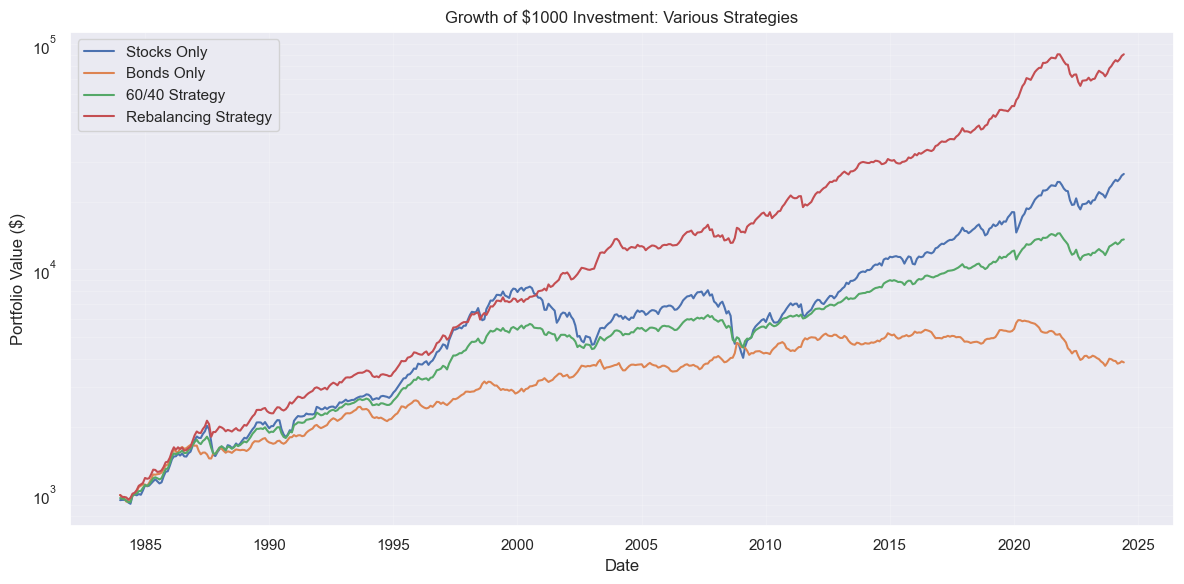

STOCKS ONLY
Final Portfolio Value: $26586.07
Total Return: 2558.61%
Annualized Return: 8.44%
Annualized Volatility: 12.39%
Sharpe Ratio: 0.68

BONDS ONLY
Final Portfolio Value: $3865.92
Total Return: 286.59%
Annualized Return: 3.4%
Annualized Volatility: 6.93%
Sharpe Ratio: 0.49

60/40 STRATEGY
Final Portfolio Value: $13602.05
Total Return: 1260.2%
Annualized Return: 6.66%
Annualized Volatility: 7.95%
Sharpe Ratio: 0.84

REBALANCING STRATEGY
Final Portfolio Value: $90413.96
Total Return: 8941.4%
Annualized Return: 11.76%
Annualized Volatility: 8.87%
Sharpe Ratio: 1.33


In [114]:
# Plot the cumulative returns for all strategies
plt.figure(figsize=(12, 6))
plt.plot(cumulative_stocks, label='Stocks Only')
plt.plot(cumulative_bonds, label='Bonds Only')
plt.plot(cumulative_60_40, label='60/40 Strategy')
plt.plot(cumulative_rebalancing, label='Rebalancing Strategy')
plt.legend()
plt.title('Growth of $1000 Investment: Various Strategies')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.yscale('log')  # Using log scale for better visualization of long-term growth
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.tight_layout()
plt.savefig('cumulative_returns.png')
plt.show()

print("STOCKS ONLY")
print("Final Portfolio Value: $" + str(round(final_value_stocks, 2)))
print("Total Return: " + str(round(total_return_stocks * 100, 2)) + "%")
print("Annualized Return: " + str(round(annualized_return_stocks * 100, 2)) + "%")
print("Annualized Volatility: " + str(round(annualized_volatility_stocks * 100, 2)) + "%")
print("Sharpe Ratio: " + str(round(sharpe_ratio_stocks, 2)))
print('')
print("BONDS ONLY")
print("Final Portfolio Value: $" + str(round(final_value_bonds, 2)))
print("Total Return: " + str(round(total_return_bonds * 100, 2)) + "%")
print("Annualized Return: " + str(round(annualized_return_bonds * 100, 2)) + "%")
print("Annualized Volatility: " + str(round(annualized_volatility_bonds * 100, 2)) + "%")
print("Sharpe Ratio: " + str(round(sharpe_ratio_bonds, 2)))
print('')
print("60/40 STRATEGY")
print("Final Portfolio Value: $" + str(round(final_value_60_40, 2)))
print("Total Return: " + str(round(total_return_60_40 * 100, 2)) + "%")
print("Annualized Return: " + str(round(annualized_return_60_40 * 100, 2)) + "%")
print("Annualized Volatility: " + str(round(annualized_volatility_60_40 * 100, 2)) + "%")
print("Sharpe Ratio: " + str(round(sharpe_ratio_60_40, 2)))
print('')
print("REBALANCING STRATEGY")
print("Final Portfolio Value: $" + str(round(final_value_rebalancing, 2)))
print("Total Return: " + str(round(total_return_rebalancing * 100, 2)) + "%")
print("Annualized Return: " + str(round(annualized_return_rebalancing * 100, 2)) + "%")
print("Annualized Volatility: " + str(round(annualized_volatility_rebalancing * 100, 2)) + "%")
print("Sharpe Ratio: " + str(round(sharpe_ratio_rebalancing, 2)))

**The Rebalancing Strategy has the highest return (both cumulative & annualized) among all strategies.**

**Although the Rebalancing Strategy has a higher standard deviation compared to the 60/40 Strategy and Bonds Only, it is still lower than the Stocks Only strategy. This moderate level of risk, combined with the high mean return, results in a higher Sharpe ratio.**

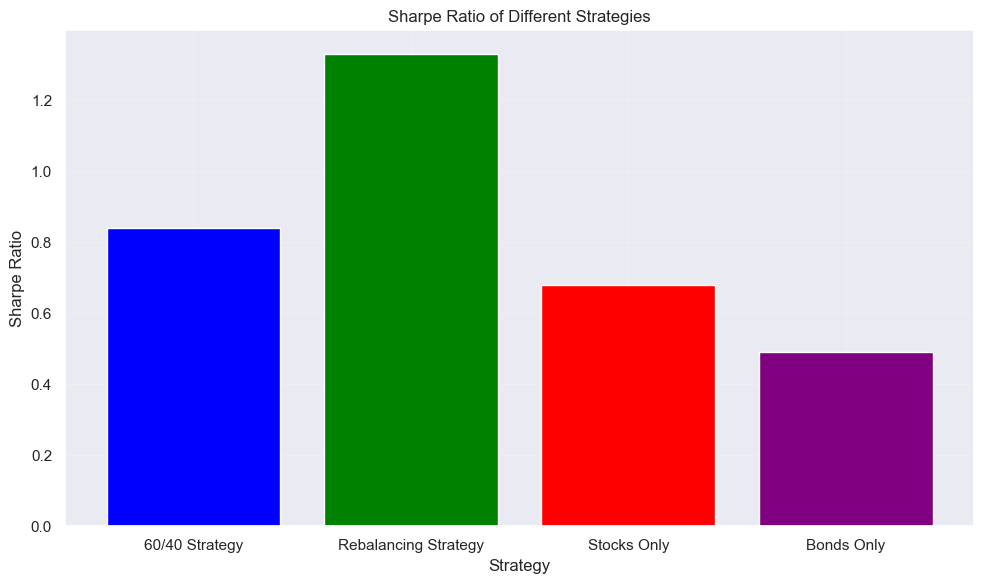

In [115]:
# Data for plotting
strategies = ['60/40 Strategy', 'Rebalancing Strategy', 'Stocks Only', 'Bonds Only']
sharpe_ratios = [0.84, 1.33, 0.68, 0.49]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(strategies, sharpe_ratios, color=['blue', 'green', 'red', 'purple'])
plt.title('Sharpe Ratio of Different Strategies')
plt.xlabel('Strategy')
plt.ylabel('Sharpe Ratio')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.tight_layout()
plt.savefig('sharpe_ratio_comparison.png')
plt.show()

**Risk-Adjusted Return:**

The Sharpe ratio is a measure of risk-adjusted return. The Rebalancing Strategy's ability to dynamically allocate between stocks and bonds based on past performance allows it to capture higher returns while managing risk effectively.
In summary, the Rebalancing Strategy's higher mean return and moderate standard deviation lead to a higher Sharpe ratio, indicating better risk-adjusted performance compared to the other strategies.